**Data Exploration and Preprocessing:**

1. **Load the dataset and conduct basic data exploration (summary statistics, missing values, data types).**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = '/content/sample_data/adult_with_headers.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors           13.0   
1   50   Self-emp-not-inc   83311   Bachelors           13.0   
2   38            Private  215646     HS-grad            9.0   
3   53            Private  234721        11th            7.0   
4   28            Private  338409   Bachelors           13.0   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0        2174.0           0.0            40.0   United-States   <=50

In [4]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26875 entries, 0 to 26874
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             26875 non-null  int64  
 1   workclass       26875 non-null  object 
 2   fnlwgt          26875 non-null  int64  
 3   education       26874 non-null  object 
 4   education_num   26874 non-null  float64
 5   marital_status  26874 non-null  object 
 6   occupation      26874 non-null  object 
 7   relationship    26874 non-null  object 
 8   race            26874 non-null  object 
 9   sex             26874 non-null  object 
 10  capital_gain    26874 non-null  float64
 11  capital_loss    26874 non-null  float64
 12  hours_per_week  26874 non-null  float64
 13  native_country  26874 non-null  object 
 14  income          26874 non-null  object 
dtypes: float64(4), int64(2), object(9)
memory usage: 3.1+ MB
None


In [5]:
# Check for missing values
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         1
education_num     1
marital_status    1
occupation        1
relationship      1
race              1
sex               1
capital_gain      1
capital_loss      1
hours_per_week    1
native_country    1
income            1
dtype: int64


In [21]:
#Handle missing values impute mean in the null values
imputed_df = df.fillna(df.mean())

<ipython-input-21-245d3979ad1b>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  imputed_df = df.fillna(df.mean())


In [22]:
print(imputed_df.isnull().sum())

age                              0
workclass                        0
fnlwgt                           0
education                        0
education_num                    0
marital_status                   0
occupation                       0
relationship                     0
race                             1
sex                              1
capital_gain                     0
capital_loss                     0
hours_per_week                   0
native_country                   0
income                           1
Age_Group_Middle-Aged            0
Age_Group_Senior                 0
Age_Group_Elderly                0
Work_Hours_Category_Full-Time    0
Work_Hours_Category_Overtime     0
Work_Hours_Category_Extreme      0
capital_gain_log                 0
dtype: int64


In [27]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
                 age     workclass        fnlwgt     education  education_num  \
count   26875.000000  26875.000000  2.687500e+04  26875.000000   26874.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
mean       38.614512      3.869470  1.897247e+05     10.300800      10.084692   
std        13.672291      1.455143  1.051341e+05      3.866417       2.564925   
min        17.000000      0.000000  1.200000e+01      0.000000       1.000000   
25%        28.000000      4.000000  1.179630e+05      9.000000       9.000000   
50%        37.000000      4.000000  1.784210e+05     11.000000      10.000000   
75%        48.000000      4.000000  2.368785e+05     12.000000      12.000000   
max        90.000000      8.000000  1.484705e+06     16.000000      16.000000   

      

2. **Apply scaling techniques to numerical features:**

•	Standard Scaling

•	Min-Max Scaling


In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Selecting only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [29]:
# Standard Scaling
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])
print(display(df_standard_scaled.head()))

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,Age_Group_Middle-Aged,Age_Group_Senior,Age_Group_Elderly,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,Work_Hours_Category_Extreme,capital_gain_log
0,0.028195,2.151396,-1.067311,-0.336442,1.136627,0.918037,-1.315345,-0.280314,White,Male,...,-0.033218,0.290626,<=50K,1,0,0,1,0,0,2.833646
1,0.832757,1.464165,-1.012190,-0.336442,1.136627,-0.405617,-0.607195,-0.902603,White,Male,...,-2.227973,0.290626,<=50K,0,1,0,0,0,0,-0.298902
2,-0.044947,0.089704,0.246559,0.180843,-0.422902,-1.729271,-0.135095,-0.280314,White,Male,...,-0.033218,0.290626,<=50K,1,0,0,1,0,0,-0.298902
3,1.052183,0.089704,0.427998,-2.405579,-1.202666,-0.405617,-0.135095,-0.902603,Black,Male,...,-0.033218,0.290626,<=50K,0,1,0,1,0,0,-0.298902
4,-0.776367,0.089704,1.414261,-0.336442,1.136627,-0.405617,0.809104,2.208842,Black,Female,...,-0.033218,-4.056256,<=50K,1,0,0,1,0,0,-0.298902


None


In [30]:
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[numerical_cols] = min_max_scaler.fit_transform(df[numerical_cols])
print(df_min_max_scaled.head())

        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.301370      0.875  0.052202     0.5625       0.800000        0.571429   
1  0.452055      0.750  0.056105     0.5625       0.800000        0.285714   
2  0.287671      0.500  0.145238     0.6875       0.533333        0.000000   
3  0.493151      0.500  0.158086     0.0625       0.400000        0.285714   
4  0.150685      0.500  0.227924     0.5625       0.800000        0.285714   

   occupation  relationship    race      sex  ...  hours_per_week  \
0    0.066667      0.166667   White     Male  ...        0.397959   
1    0.266667      0.000000   White     Male  ...        0.122449   
2    0.400000      0.166667   White     Male  ...        0.397959   
3    0.400000      0.000000   Black     Male  ...        0.397959   
4    0.666667      0.833333   Black   Female  ...        0.397959   

   native_country  income  Age_Group_Middle-Aged Age_Group_Senior  \
0        0.928571   <=50K                      

3. **Discuss the scenarios where each scaling technique is preferred and why.**

1. **Standard Scaling (Z-score normalization)**:
   - **Scenario**: Use Standard Scaling when your data follows a normal distribution or when the algorithm assumes a Gaussian distribution (e.g., linear regression, logistic regression, or k-means).
   - **Why**: This technique centers the data around the mean (0) and scales it to have a standard deviation of 1. It’s useful for algorithms sensitive to the magnitude of data (e.g., SVM, PCA).

2. **Min-Max Scaling (Normalization)**:
   - **Scenario**: Use Min-Max Scaling when the data does not assume any specific distribution, or when you need to preserve the relationships between values but scale them to a specific range (commonly [0, 1]).
   - **Why**: This technique scales the data to a fixed range, which is especially useful for algorithms like neural networks that perform better with bounded input data.

**Encoding Techniques:**

1.**Apply One-Hot Encoding to categorical variables with less than 5 categories.**

In [31]:
# categorical columns with less than 5 unique categories
categorical_columns = df.select_dtypes(include=['object']).columns
columns_to_encode = [col for col in categorical_columns if df[col].nunique() < 5]
# Apply One-Hot Encoding to these columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)
df_encoded.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,...,native_country,Age_Group_Middle-Aged,Age_Group_Senior,Age_Group_Elderly,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,Work_Hours_Category_Extreme,capital_gain_log,sex_ Male,income_ >50K
0,39,7,77516,9,13.0,4,1,1,White,2174.0,...,39,1,0,0,1,0,0,7.684784,1,0
1,50,6,83311,9,13.0,2,4,0,White,0.0,...,39,0,1,0,0,0,0,0.000000,1,0
2,38,4,215646,11,9.0,0,6,1,White,0.0,...,39,1,0,0,1,0,0,0.000000,1,0
3,53,4,234721,1,7.0,2,6,0,Black,0.0,...,39,0,1,0,1,0,0,0.000000,1,0
4,28,4,338409,9,13.0,2,10,5,Black,0.0,...,5,1,0,0,1,0,0,0.000000,0,0


2. **Use Label Encoding for categorical variables with more than 5 categories.**

In [32]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
columns_to_label_encode = [col for col in categorical_columns if df[col].nunique() > 5]
# Apply Label Encoding to these columns
label_encoders = {}
for col in columns_to_label_encode:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le     # Store the encoder for future use
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,hours_per_week,native_country,income,Age_Group_Middle-Aged,Age_Group_Senior,Age_Group_Elderly,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,Work_Hours_Category_Extreme,capital_gain_log
0,39,7,77516,9,13.0,4,1,1,White,Male,...,40.0,39,<=50K,1,0,0,1,0,0,7.684784
1,50,6,83311,9,13.0,2,4,0,White,Male,...,13.0,39,<=50K,0,1,0,0,0,0,0.000000
2,38,4,215646,11,9.0,0,6,1,White,Male,...,40.0,39,<=50K,1,0,0,1,0,0,0.000000
3,53,4,234721,1,7.0,2,6,0,Black,Male,...,40.0,39,<=50K,0,1,0,1,0,0,0.000000
4,28,4,338409,9,13.0,2,10,5,Black,Female,...,40.0,5,<=50K,1,0,0,1,0,0,0.000000


3. **Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

### One-Hot Encoding

**Pros:**

1. **No Ordinal Relationship Assumption**: One-Hot Encoding does not assume any ordinal relationship between the categories. This is ideal for categorical variables where the categories are nominal (i.e., unordered).
  
2. **Interpretability**: The encoded data is easily interpretable. Each category is represented as a binary feature, making it clear what each column represents.
  
3. **Reduced Bias**: Since each category is represented independently, the model won’t mistakenly infer any relationship between categories.

4. **Wide Compatibility**: Many machine learning models, especially linear models, work better with One-Hot Encoded data because it avoids the introduction of spurious ordinality.

**Cons:**

1. **High Dimensionality**: One-Hot Encoding can lead to a significant increase in the number of features, especially when the categorical variable has many levels. This can lead to the “curse of dimensionality,” making the model slower and harder to train.

2. **Sparse Data**: The resulting matrix is sparse (mostly zeros), which can increase memory usage and computational cost, particularly in large datasets.

3. **Not Suitable for High Cardinality**: If a categorical variable has too many categories, One-Hot Encoding can become impractical due to the large number of resulting features.

###When to Use

**Use Label Encoding**
  - The categorical variable has an inherent order (ordinal).
  - You have a high-cardinality variable, and you need a compact representation.
  - You are using models that can handle or require ordinal relationships (e.g., tree-based models like Random Forest, which can sometimes handle label-encoded data effectively).
### Label Encoding

**Pros:**

1. **Simplicity**: Label Encoding is simple and easy to implement. It converts each category into a unique integer, which can be more efficient in terms of memory and computation.

2. **Reduced Dimensionality**: Unlike One-Hot Encoding, Label Encoding does not increase the dimensionality of the dataset, which is beneficial when working with algorithms that don’t handle high-dimensional data well.

3. **Compact Representation**: Because it uses a single column, it’s more compact and can handle high-cardinality variables more efficiently than One-Hot Encoding.

**Cons:**

1. **Assumes Ordinal Relationship**: Label Encoding assigns an integer to each category, which implies an ordinal relationship between categories even if none exists. This can lead to incorrect assumptions by the model.

2. **Bias in Models**: Many machine learning models may interpret the encoded values as having a natural order (e.g., 1 < 2 < 3), leading to unintended bias in the predictions.

3. **Less Interpretability**: The numerical labels are less interpretable than the binary flags created by One-Hot Encoding, which can make understanding the model’s decisions harder.

### When to Use :
- **Use One-Hot Encoding** when:
  - The categorical variable is nominal (no inherent order).
  - You have a small number of categories, or the model can handle high-dimensionality.
  - You are using models like linear regression, logistic regression, or tree-based models where no ordinal relationships should be inferred.


**Feature Engineering:**

1. **Create at least 2 new features that could be beneficial for the model. Explain the rationale behind your choices.**

 * **Age Group**

  Instead of using age as a continuous variable, it might be beneficial to group ages into categories or bins (e.g., young, middle-aged, senior). This could capture non-linear relationships between age and the target variable. For instance, certain age groups might behave similarly in ways that affect the model's predictions.


In [33]:
# Creating an Age Group feature
bins = [0, 25, 45, 65, 100]  # Adjust these ranges as per the dataset's distribution
labels = ['Young', 'Middle-Aged', 'Senior', 'Elderly']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)
#  One-Hot Encode this new feature if it's categorical
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)
print(df.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9           13.0               4   
1   50          6   83311          9           13.0               2   
2   38          4  215646         11            9.0               0   
3   53          4  234721          1            7.0               2   
4   28          4  338409          9           13.0               2   

   occupation  relationship    race      sex  ...  Age_Group_Middle-Aged  \
0           1             1   White     Male  ...                      1   
1           4             0   White     Male  ...                      0   
2           6             1   White     Male  ...                      1   
3           6             0   Black     Male  ...                      0   
4          10             5   Black   Female  ...                      1   

   Age_Group_Senior  Age_Group_Elderly  Work_Hours_Category_Full-Time  \
0                 0                  0     

* **Work Hours per Week Categorization**

The number of hours someone works per week can be an indicator of their work-life balance, income, or job type. Instead of using raw work hours, you could create categories such as part-time, full-time, and overtime. This categorization can help the model distinguish between different working habits.

In [34]:
# Creating a Work Hours Category feature
df['Work_Hours_Category'] = pd.cut(df['hours_per_week'], bins=[0, 20, 40, 60, 100],
                                   labels=['Part-Time', 'Full-Time', 'Overtime', 'Extreme'])
#  One-Hot Encode this new feature
df = pd.get_dummies(df, columns=['Work_Hours_Category'], drop_first=True)
print(df.head())


   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9           13.0               4   
1   50          6   83311          9           13.0               2   
2   38          4  215646         11            9.0               0   
3   53          4  234721          1            7.0               2   
4   28          4  338409          9           13.0               2   

   occupation  relationship    race      sex  ...  \
0           1             1   White     Male  ...   
1           4             0   White     Male  ...   
2           6             1   White     Male  ...   
3           6             0   Black     Male  ...   
4          10             5   Black   Female  ...   

   Work_Hours_Category_Full-Time  Work_Hours_Category_Overtime  \
0                              1                             0   
1                              0                             0   
2                              1                        

2. **Apply a transformation (e.g., log transformation) to at least one skewed numerical feature and justify your choice.**

In [35]:
# Check for skewness in numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
skewness = df[numerical_columns].skew().sort_values(ascending=False)
print("Skewness in numerical features:")
print(skewness)

Skewness in numerical features:
capital_gain        11.810639
capital_loss         4.604299
capital_gain_log     3.102044
fnlwgt               1.444791
relationship         0.785048
age                  0.565893
hours_per_week       0.230603
occupation           0.111895
marital_status      -0.013257
education_num       -0.297320
workclass           -0.749071
education           -0.938764
native_country      -3.671471
dtype: float64


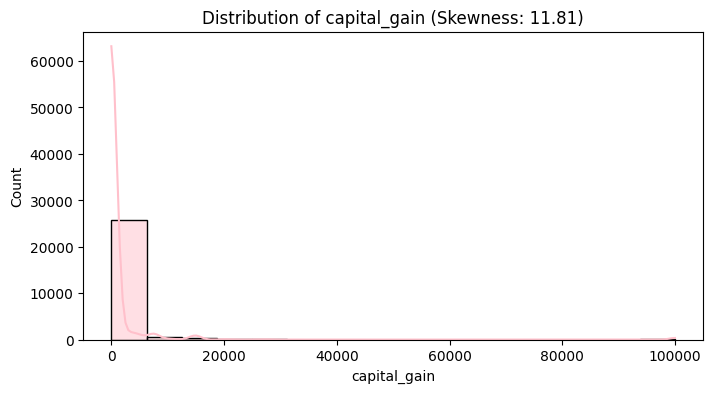

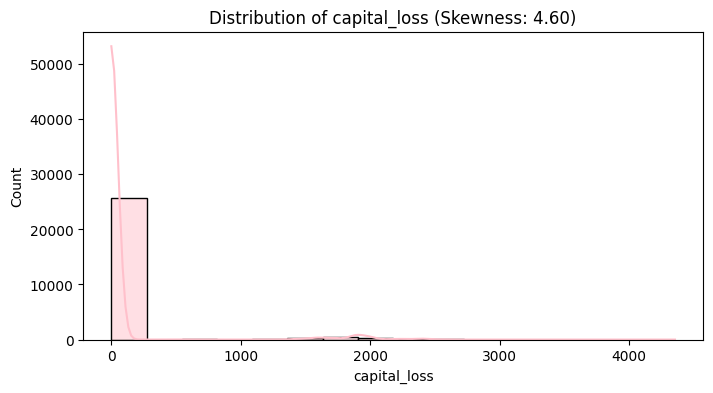

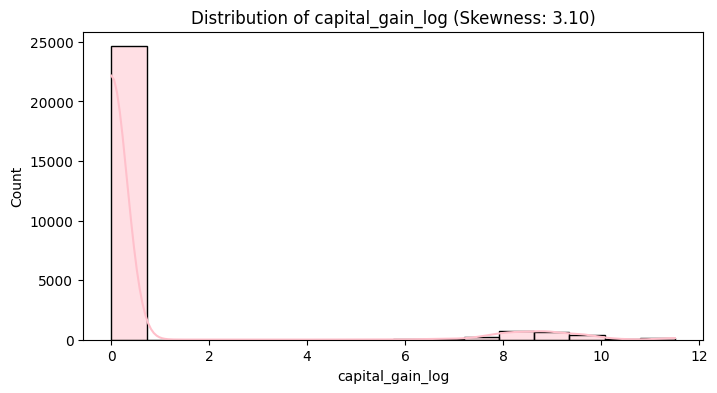

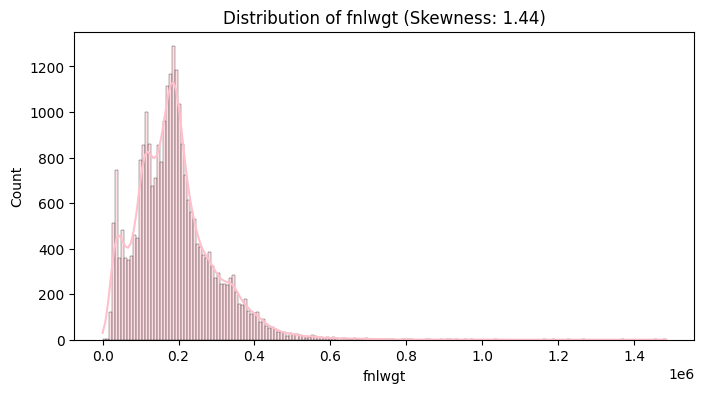

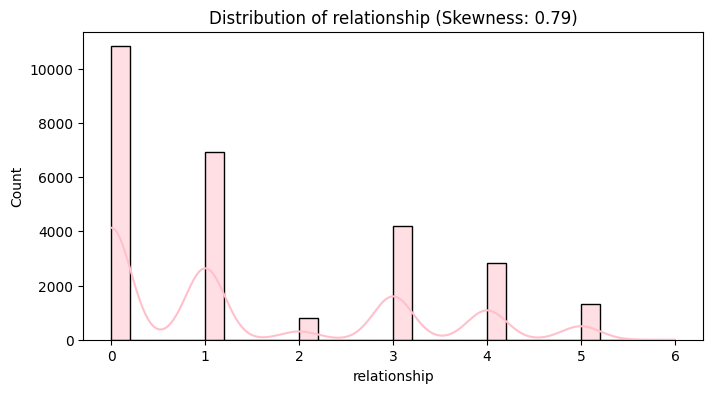

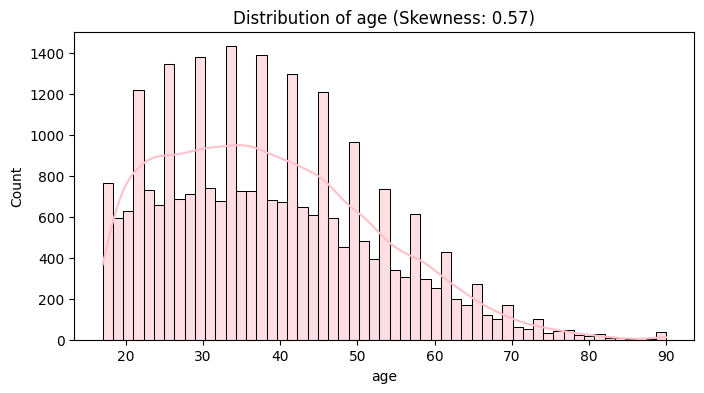

In [36]:
# Plotting histograms for the most skewed features
skewed_columns = skewness[skewness > 0.5].index  # Taking only highly skewed features
for col in skewed_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='pink')
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
    plt.show()

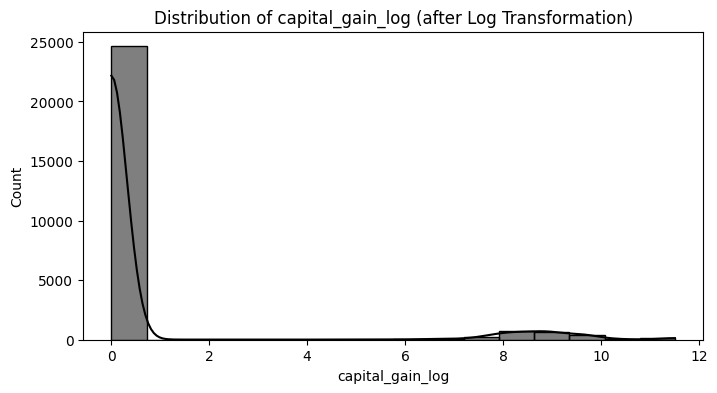

In [37]:
# Apply log transformation to the 'capital-gain' feature (replace with the correct column if different)
df['capital_gain_log'] = np.log1p(df['capital_gain'])   # log1p is used to handle zeros in the data

# Verify the transformation by plotting the distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['capital_gain_log'], kde=True,color='black')
plt.title('Distribution of capital_gain_log (after Log Transformation)')
plt.show()

 **Feature Selection:**

1. 	**Use the Isolation Forest algorithm to identify and remove outliers. Discuss how outliers can affect model performance.**

In [44]:
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer

In [46]:
# Select numerical features for outlier detection
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values with the mean (you can also use 'median' or other strategies)
imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

# Apply Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outliers = iso_forest.fit_predict(df[numerical_columns])

# Add the outliers column to the dataframe
df['Outlier'] = outliers

# Filter out the outliers (-1 indicates an outlier)
df_cleaned = df[df['Outlier'] != -1]

# Drop the outlier indicator column
df_cleaned = df_cleaned.drop(columns=['Outlier'])

# Display the number of outliers detected and the cleaned dataframe
print(f"Number of outliers detected: {sum(outliers == -1)}")
df_cleaned.head()

Number of outliers detected: 269


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,Work_Hours_Category_Extreme,capital_gain_log,Age_Group_Middle-Aged,Age_Group_Senior,Age_Group_Elderly,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,Work_Hours_Category_Extreme
0,39.0,7.0,77516.0,9.0,13.0,4.0,1.0,1.0,White,Male,...,1,0,0,7.684784,1,0,0,1,0,0
1,50.0,6.0,83311.0,9.0,13.0,2.0,4.0,0.0,White,Male,...,0,0,0,0.000000,0,1,0,0,0,0
2,38.0,4.0,215646.0,11.0,9.0,0.0,6.0,1.0,White,Male,...,1,0,0,0.000000,1,0,0,1,0,0
3,53.0,4.0,234721.0,1.0,7.0,2.0,6.0,0.0,Black,Male,...,1,0,0,0.000000,0,1,0,1,0,0
4,28.0,4.0,338409.0,9.0,13.0,2.0,10.0,5.0,Black,Female,...,1,0,0,0.000000,1,0,0,1,0,0


2. 	**Apply the PPS (Predictive Power Score) to find and discuss the relationships between features. Compare its findings with the correlation matrix.**

In [ ]:
#INSTALL REQUIRED LIBRARY
!pip install ppscore

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.2 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=3781e950e701a6559de106cce5d29ce08a4fa002ed54447e13d3dac0598c2927
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
xarray 2024.6.0 requires pandas>=2.0, but you have pandas 1.5.3 which is

In [24]:
import ppscore as pps
# Calculate the PPS matrix
pps_matrix = pps.matrix(df)
# Display the PPS matrix (only the scores)
pps_matrix_pivot = pps_matrix.pivot(columns='x', index='y', values='ppscore')
print("PPS Matrix:")
pps_matrix_pivot

PPS Matrix:


x,Age_Group_Elderly,Age_Group_Middle-Aged,Age_Group_Senior,Work_Hours_Category_Extreme,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,age,capital_gain,capital_gain_log,capital_loss,...,fnlwgt,hours_per_week,income,marital_status,native_country,occupation,race,relationship,sex,workclass
y,,,,,,,,,,,,,,,,,,,,,
Age_Group_Elderly,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Age_Group_Middle-Aged,1.679911e-02,1.000000e+00,3.311858e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.005364,0.005364,0.00000,...,0.081663,0.062074,0.000000,0.021916,0.000000,1.528352e-02,0.000000e+00,3.217670e-02,0.000000e+00,0.000000
Age_Group_Senior,0.000000e+00,1.663876e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Work_Hours_Category_Extreme,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Work_Hours_Category_Full-Time,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.495939e-01,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
Work_Hours_Category_Overtime,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.393611e-01,1.000000e+00,0.000000,0.000000,0.000000,0.00000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
age,9.657213e-02,3.987939e-02,3.243032e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.009098,0.009098,0.00000,...,0.000000,0.000000,0.030101,0.203893,0.000000,8.755907e-03,0.000000e+00,1.360650e-01,0.000000e+00,0.020031
capital_gain,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,0.996992,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
capital_gain_log,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.999596,1.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


In [25]:
# Calculate the correlation matrix for numerical features
corr_matrix = df.corr()
# Display the correlation matrix
print("Correlation Matrix:")
corr_matrix

Correlation Matrix:


<ipython-input-25-f4c65dd9e438>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,Age_Group_Middle-Aged,Age_Group_Senior,Age_Group_Elderly,Work_Hours_Category_Full-Time,Work_Hours_Category_Overtime,Work_Hours_Category_Extreme,capital_gain_log
age,1.000000,0.006733,-0.073944,-0.012628,0.036696,-0.263744,-0.017824,-0.260874,0.076774,0.056222,0.069018,-0.002028,-0.244374,0.640494,0.472980,-0.043575,0.057429,0.027936,0.121979
workclass,0.006733,1.000000,-0.014590,0.019916,0.049243,-0.066884,0.252833,-0.090620,0.031875,0.014209,0.139631,-0.009391,0.072958,0.020995,-0.080924,-0.076287,0.099140,0.071141,0.019947
fnlwgt,-0.073944,-0.014590,1.000000,-0.027968,-0.044666,0.027845,0.001717,0.008560,0.002065,-0.013312,-0.017638,-0.052702,0.017790,-0.058481,-0.023569,0.031356,-0.022765,-0.017422,-0.001980
education,-0.012628,0.019916,-0.027968,1.000000,0.356005,-0.037143,-0.024581,-0.004644,0.032018,0.015812,0.049289,0.065014,0.040925,-0.018737,-0.037227,-0.016019,0.043269,0.007630,0.025463
education_num,0.036696,0.049243,-0.044666,0.356005,1.000000,-0.068301,0.111243,-0.094571,0.123516,0.080336,0.147997,0.050360,0.123439,-0.002706,-0.048381,-0.124071,0.171678,0.034239,0.128444
marital_status,-0.263744,-0.066884,0.027845,-0.037143,-0.068301,1.000000,-0.014019,0.182463,-0.044217,-0.033501,-0.194604,-0.021634,-0.141835,-0.192440,0.063671,0.030426,-0.123712,-0.040076,-0.068122
occupation,-0.017824,0.252833,0.001717,-0.024581,0.111243,-0.014019,1.000000,-0.081846,0.027979,0.019965,0.083543,-0.012415,0.040596,0.004699,-0.056509,-0.084620,0.089959,0.047175,0.014506
relationship,-0.260874,-0.090620,0.008560,-0.004644,-0.094571,0.182463,-0.081846,1.000000,-0.056838,-0.061167,-0.247961,-0.007166,-0.047048,-0.155765,-0.072838,0.116978,-0.202285,-0.068800,-0.085199
capital_gain,0.076774,0.031875,0.002065,0.032018,0.123516,-0.044217,0.027979,-0.056838,1.000000,-0.031474,0.076279,-0.003573,-0.014131,0.061244,0.021008,-0.059180,0.064487,0.048058,0.564980
capital_loss,0.056222,0.014209,-0.013312,0.015812,0.080336,-0.033501,0.019965,-0.061167,-0.031474,1.000000,0.057013,-0.000438,0.013872,0.029745,0.018157,-0.041550,0.053047,0.023385,-0.064637
